# Data Scrubbing and Cleaning for Improved Analysis with DataCleaner  

Check my Github for [this project's details](https://github.com/westrany/Data-Scrubbing-and-Cleaning-for-Improved-Analysis-with-DataCleaner/blob/main/README.md). More info on the chosen dataset has been [uploaded to Kaggle](https://www.kaggle.com/datasets/mariafitas/goodreads-small-dataset).

---
## Libraries Imported

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

---
## **Data Collection**  

### **Load CSV Data into DataFrame**

In [2]:
# For file in the same directory
df = pd.read_csv('unclean_goodreads_library_export.csv') 

# If the CSV file is in a different directory, specify the path
# df = pd.read_csv('/path/to/your_file.csv')

# If the CSV file is hosted online, provide the URL
# df = pd.read_csv('https://example.com/your_file.csv')

### **Display First Few Rows**

In [3]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Set display options to show full numbers without scientific notation
# (forces the full number of ISBN13 values to appear instead of in scientific notation)
pd.set_option('display.float_format', '{:.0f}'.format)

# Display all rows of the DataFrame
print("All rows of the DataFrame:")
display(df)

All rows of the DataFrame:


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaN,30/01/2024,to-read,to-read (#179),to-read,NaN,NaN,NaN,0,0
1,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaN,30/01/2024,to-read,to-read (#179),to-read,NaN,NaN,NaN,0,0
2,11838916,Cat Stories (Everyman's Library Pocket Classic...,Diana Secker Tesdell,"Tesdell, Diana Secker",NaN,307700895,9780310000000,0,4,Everyman's Library,Hardcover,400,2011,2011,NaN,29/01/2024,"cats, fiction, short-stories, currently-reading","cats (#5), fiction (#35), short-stories (#2), ...",currently-reading,NaN,NaN,NaN,1,0
3,37844623,"The Blood (Jem Flockhart, #3)",E.S. Thomson,"Thomson, E.S.",NaN,1472126572,9781470000000,5,4,Constable,Hardcover,375,2018,2018,28/01/2024,18/01/2024,"historical-fiction, mystery","historical-fiction (#5), mystery (#7)",read,NaN,NaN,NaN,1,0
4,124798505,Four Seasons in Japan,Nick Bradley,"Bradley, Nick",NaN,085752934X,9780860000000,0,4,Doubleday,Hardcover,336,2023,2023,NaN,08/12/2023,to-read,to-read (#178),to-read,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,6662279,Herbert West—Reanimator,H.P. Lovecraft,"Lovecraft, H.P.",NaN,1409936481,9781410000000,4,4,Dodo Pr,Paperback,35,2008,1922,NaN,03/04/2019,fiction,fiction (#7),read,NaN,NaN,NaN,1,0
402,31333,Violin,Anne Rice,"Rice, Anne",NaN,8466302204,9788470000000,5,3,Suma De Letras,Paperback,289,2002,1997,19/01/2021,02/04/2019,horror-thriller,horror-thriller (#2),read,NaN,NaN,NaN,1,0
403,5907,"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,"Tolkien, J.R.R.","Douglas A. Anderson, Michael Hague, Jemima Catlin",NaN,NaN,5,4,Houghton Mifflin,Paperback,366,2002,1937,NaN,02/04/2019,fantasy,fantasy (#4),read,I was 7 when my dad began to read me The Hobbi...,NaN,NaN,1,0
404,39798828,The Fall of Gondolin (Middle-Earth Universe),J.R.R. Tolkien,"Tolkien, J.R.R.",Christopher Tolkien,1328613046,9781330000000,5,4,Houghton Mifflin Harcourt,Hardcover,304,2018,2018,09/02/2020,02/04/2019,fantasy,fantasy (#3),read,NaN,NaN,NaN,1,0


---

## Initial Data Assessment

### **Display the structure of the dataset (columns, data types, dataframe size)**

In [4]:
print("Columns and Data Types:")
display(df.dtypes)

print("\nSize of the DataFrame:")
display(df.shape)

Columns and Data Types:


Book Id                         int64
Title                          object
Author                         object
Author l-f                     object
Additional Authors             object
ISBN                           object
ISBN13                        float64
My Rating                       int64
Average Rating                float64
Publisher                      object
Binding                        object
Number of Pages               float64
Year Published                float64
Original Publication Year     float64
Date Read                      object
Date Added                     object
Bookshelves                    object
Bookshelves with positions     object
Exclusive Shelf                object
My Review                      object
Spoiler                        object
Private Notes                  object
Read Count                      int64
Owned Copies                    int64
dtype: object


Size of the DataFrame:


(406, 24)

### **Change data types to match expectations**  

Date columns "**Date Read**" and "**Date Added**" should be in the DD/MM/YYYY formats.  

In [5]:
# Convert Data Read and Data Added columns to DD/MM/YYYY
df['Date Read'] = pd.to_datetime(df['Date Read'], format='%d/%m/%Y', errors='coerce')
df['Date Added'] = pd.to_datetime(df['Date Added'], format='%d/%m/%Y', errors='coerce')


# Verify changes and check distribution of values
print("Data type of 'Date Read' column:", df['Date Read'].dtype, end='\n\n')
print("Data type of 'Date Added' column:", df['Date Added'].dtype, end='\n\n')

Data type of 'Date Read' column: datetime64[ns]

Data type of 'Date Added' column: datetime64[ns]



The column "**Spoiler**" refers to the existence of book spoilers in the "My Review" data. Currently the column marks TRUE when there is a value, and leaves it blank when there are no spoilers. To better analyse this, I'm changing the TRUE values to 1, and the empty cells to 0, thus converting the column to integer values, and then to boolean.

In [6]:
# Fill missing values with 0
df['Spoiler'] = df['Spoiler'].fillna(0)

# Replace 'TRUE' values with 1
df.loc[df['Spoiler'] == 'TRUE', 'Spoiler'] = 1

# Convert to boolean
df['Spoiler'] = df['Spoiler'].astype(bool)

# Convert column to categorical type
df['Spoiler'] = df['Spoiler'].astype('category')


# Verify changes and check distribution of values
print("Data type of 'Spoiler' column after conversion:", df['Spoiler'].dtype)
print("\nDistribution of values in 'Spoiler' column:")
print(df['Spoiler'].value_counts())

Data type of 'Spoiler' column after conversion: category

Distribution of values in 'Spoiler' column:
False    403
True       3
Name: Spoiler, dtype: int64


### **Predict which collumns are Categorical and which are Numerical values**

In [7]:
def classify_columns(df):
    categorical_cols = []
    numerical_cols = []
    
    for col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_string_dtype(df[col]):
            categorical_cols.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
    
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = classify_columns(df)

print("Categorical columns:", categorical_cols, end='\n\n')
print("Numerical columns:", numerical_cols)

Categorical columns: ['Title', 'Author', 'Author l-f', 'Additional Authors', 'ISBN', 'Publisher', 'Binding', 'Bookshelves', 'Bookshelves with positions', 'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes']

Numerical columns: ['Book Id', 'ISBN13', 'My Rating', 'Average Rating', 'Number of Pages', 'Year Published', 'Original Publication Year', 'Read Count', 'Owned Copies']


### **Check for missing data**

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Book Id                         0
Title                           0
Author                          0
Author l-f                      0
Additional Authors            292
ISBN                           89
ISBN13                         82
My Rating                       0
Average Rating                  0
Publisher                      12
Binding                         6
Number of Pages                11
Year Published                  7
Original Publication Year      36
Date Read                     279
Date Added                      0
Bookshelves                    11
Bookshelves with positions     11
Exclusive Shelf                 0
My Review                     389
Spoiler                         0
Private Notes                 389
Read Count                      0
Owned Copies                    0
dtype: int64


### **Visualise missing values**

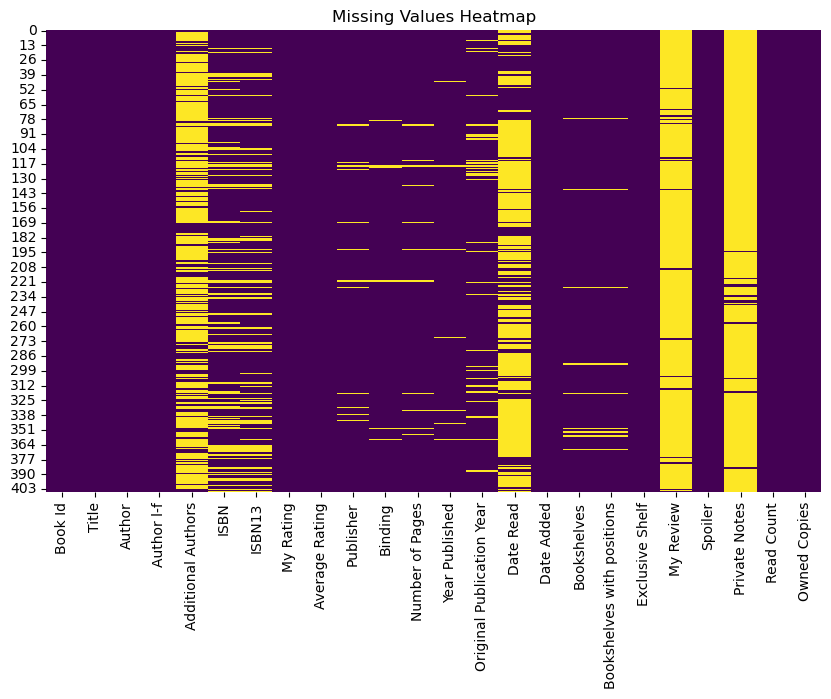

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### **Handle Missing Values**  

For values that are expected to be present based on the context of the data but are somehow not recorded or included in the dataset..  

For the "**Additional Authors**" column, the missing values correspond to the inexistence of additional authors to the book in question. This is a common occurrence given that most books only have one author. 

For cases where missing values represent user choice as is the case with the "**Date Read**", "**My Review**", "**Private Notes**", "**Bookshelves**" and "**Bookshelves with positions**" columns where the absence of values means that I did no write a review for said book, nor added private notes; and the "**Publisher**", "**Binding**", "**Number of Pages**" and "**Original Publication Year**" columns whose missing values are expected to be present based on the context of the data but are somehow not recorded or included in the dataset, I will be changing the empty cells to 'NaN'.  

Later on, depending on the type of analysis needed, such columns might be oppressed or have values added based on medians or modes.

In [10]:
# List of columns where missing values correspond to the absence of additional information
columns_to_fill_with_nan = ["Additional Authors", "My Review", "Private Notes", 
                            "Bookshelves", "Bookshelves with positions",
                           "Date Read"]

# Replace empty strings with NaN
df[columns_to_fill_with_nan] = df[columns_to_fill_with_nan].replace('', np.nan)

# Fill missing values with NaN
df[columns_to_fill_with_nan] = df[columns_to_fill_with_nan].fillna(np.nan)

# Calculate total number of cells filled with NaN for the initial set of columns
cells_filled_count = df[columns_to_fill_with_nan].isnull().sum().sum()

# Verify if missing values were filled with NaN per column for the initial set of columns
nan_counts = {}
for col in columns_to_fill_with_nan:
    num_cells_filled_with_nan = df[col].isnull().sum()
    nan_counts[col] = num_cells_filled_with_nan

# For columns whose missing values are expected to be present based on the context of the data but are somehow not recorded or included in the dataset,
# change the empty cells to 'NaN'
columns_to_fill_with_nan_expected = ["Publisher", "Binding", "Number of Pages", "Original Publication Year"]
df[columns_to_fill_with_nan_expected] = df[columns_to_fill_with_nan_expected].replace('', np.nan)

# Calculate total number of cells filled with NaN for the additional expected columns
cells_filled_count_expected = df[columns_to_fill_with_nan_expected].isnull().sum().sum()

# Verify if missing values were filled with NaN per column for the additional expected columns
for col in columns_to_fill_with_nan_expected:
    num_cells_filled_with_nan_expected = df[col].isnull().sum()
    nan_counts[col] = num_cells_filled_with_nan_expected

# Convert nan_counts dictionary to DataFrame for displaying in a table
nan_counts_df = pd.DataFrame.from_dict(nan_counts, orient='index', columns=['Number of cells filled with NaN'])

# Print total number of cells filled with NaN for both sets of columns
total_cells_filled_count = cells_filled_count + cells_filled_count_expected
print(f"Total number of cells filled with NaN (including both sets of columns): {total_cells_filled_count}\n")

# Display nan_counts_df as a table with left-aligned column
with pd.option_context('display.colheader_justify','left'):
    print(nan_counts_df)

Total number of cells filled with NaN (including both sets of columns): 1436

                            Number of cells filled with NaN
Additional Authors          292                            
My Review                   389                            
Private Notes               389                            
Bookshelves                  11                            
Bookshelves with positions   11                            
Date Read                   279                            
Publisher                    12                            
Binding                       6                            
Number of Pages              11                            
Original Publication Year    36                            


International Standard Book Numbers, or ISBN, are unique identifiers given to each book. ISBN (also known as ISBN 10) usually refers to books published between 1970 and 2007, whereas ISBN 13 refers to books published after 2007. There are cases where books published earlier than January 2007 have both ISBN-1o and ISBN-13. 

To understand the meaning of the missing values in the "**ISBN**" and "**ISBN13**" columns, we need to keep in mind how ISBN and ISBN 13 are used. This will let us determine if the missing value is due to an error - meaning that there might be an ISBN number which was not registered - or if there simply isn't an ISBN or ISBN 13 identifier for said book. The later is usually the case with books older than 1970. (Brief explanation of ISBNs [here](https://bookscouter.com/tips/isbn-10-vs-isbn-13-whats-the-difference/#:~:text=ISBN-10%20and%20ISBN-13%20indicate%20how%20many%20digits%20are,than%20January%202007%20have%20both%20ISBN-1o%20and%20ISBN-13.).)

This will give us the following 4 cases: book only has ISBN, book only has ISBN 13, book has both ISBN and ISBN 13, book has neither ISBN or ISBN 13. 

The first thing to do is to create a column to flag missing values for both "ISBN" and "ISBN13". Then we crosscheck the missing values for each entry with their respective publication date and mark them accordingly:  
- For rows where the "Year Published" column is missing, set the corresponding value in the "Identifier_missing" column to NaN.
- For rows where the publication year is before 1970, mark the "Identifier_missing" column as 1.
- For rows where the publication year is between 1970 and 2007 and the ISBN is missing, mark the "Identifier_missing" column as -1.
- For rows where the publication year is after 2007 and the ISBN13 is missing, mark the "Identifier_missing" column as -2.

In [11]:
# Create a new column to flag missing identifiers
df['Identifier_missing'] = 0  # Initialize with 0 for publications with no missing values

# Mark missing values based on publication date and identifier presence
# NaN for missing Publication Date
#  1 for publications before 1970
# -1 for publications between 1970 and 2007 with missing ISBN
# -2 for publications after 2007 with missing ISBN13
df.loc[df['Year Published'].isnull(), 'Identifier_missing'] = np.nan
df.loc[df['Year Published'] < 1970, 'Identifier_missing'] = 1
df.loc[(df['Year Published'] >= 1970) & (df['Year Published'] <= 2007) & df['ISBN'].isnull(), 'Identifier_missing'] = -1
df.loc[(df['Year Published'] > 2007) & df['ISBN13'].isnull(), 'Identifier_missing'] = -2

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the table with the specified columns and Identifier_missing
display_cols = ['ISBN', 'ISBN13', 'Year Published', 'Identifier_missing']
print("Table 'ISBN', 'ISBN13', 'Year Published' and 'Identifier_missing':")
display(df[display_cols])

# Reset display option to default (if needed)
pd.reset_option('display.max_rows')

Table 'ISBN', 'ISBN13', 'Year Published' and 'Identifier_missing':


,ISBN,ISBN13,Year Published,Identifier_missing
0,9896419884,9789900000000,2020,0
1,9896419884,9789900000000,2020,0
2,307700895,9780310000000,2011,0
3,1472126572,9781470000000,2018,0
4,085752934X,9780860000000,2023,0
5,085752934X,9780860000000,2023,0
6,276002105,9780280000000,1980,0
7,1683833988,9781680000000,2019,0
8,804842523,9780800000000,2012,0
9,1728376033,9781730000000,2023,0


### **Check and delete duplicate entries**

In [12]:
# Check for duplicate entries
duplicate_entries = df.duplicated()

# Display duplicate entries
print("Duplicate entries:")
display(df[duplicate_entries])

Duplicate entries:


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Identifier_missing
1,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaT,2024-01-30,to-read,to-read (#179),to-read,NaN,False,NaN,0,0,0
5,124798505,Four Seasons in Japan,Nick Bradley,"Bradley, Nick",NaN,085752934X,9780860000000,0,4,Doubleday,Hardcover,336,2023,2023,NaT,2023-12-08,to-read,to-read (#178),to-read,NaN,False,NaN,0,0,0
61,248867,"Berserk, Vol. 14",Kentaro Miura,"Miura, Kentaro",NaN,1593075014,9781590000000,5,5,Dark Horse Manga,Paperback,240,2006,1997,2023-04-12,2023-04-23,"fantasy, horror-thriller, manga, gothic","fantasy (#78), horror-thriller (#20), manga (#...",read,NaN,False,NaN,1,0,0
76,248871,"Berserk, Vol. 1 (Berserk, #1)",Kentaro Miura,"Miura, Kentaro",NaN,1593070209,9781590000000,5,4,Dark Horse Manga,Paperback,224,2003,1990,2023-03-02,2023-03-20,"horror-thriller, manga, fantasy, gothic","horror-thriller (#9), manga (#17), fantasy (#9...",read,NaN,False,NaN,1,0,0
110,2511233,The Company of Swans,Jim Crumley,"Crumley, Jim",Harry Brockway,1860465587,9781860000000,0,4,Harvill Pr,Hardcover,48,1998,1997,NaT,2023-01-18,to-read,to-read (#144),to-read,NaN,False,NaN,0,0,0
111,50781007,Chinese Fairy Tales and Legends: A Gift Editio...,Frederick H. Martens,"Martens, Frederick H.",Richard Wilhelm,1912392143,9781910000000,0,3,Bloomsbury China,Kindle Edition,288,2019,2019,NaT,2023-01-18,to-read,to-read (#132),to-read,NaN,False,NaN,0,1,0
180,36477428,"魔法使いの嫁 9 特装版 (Mahōtsukai no yome, #9)",Kore Yamazaki,"Yamazaki, Kore",ヤマザキコレ,4800007275,9784800000000,5,4,マッグガーデン,Paperback,192,2018,2018,2022-04-16,2022-06-02,"fantasy, manga","fantasy (#60), manga (#8)",read,NaN,False,NaN,1,0,0
207,43820,The Witches' Companion,Katherine Ramsland,"Ramsland, Katherine",Anne Rice,345406249,9780350000000,0,4,Ballantine Books,Paperback,544,1996,1994,NaT,2022-01-16,to-read,to-read (#62),to-read,NaN,False,NaN,0,0,0
225,12995005,"Coroa de Erva (Masters of Rome, #2)",Colleen McCullough,"McCullough, Colleen",NaN,9722902229,9789720000000,4,4,Difel,Paperback,1097,1995,1990,NaT,2021-10-27,"historical-fiction, currently-reading","historical-fiction (#3), currently-reading (#5)",currently-reading,NaN,False,belonged to dad,1,1,0
250,10365636,The Horrid Glory of Its Wings,Elizabeth Bear,"Bear, Elizabeth",NaN,1429926007,9781430000000,0,4,Tor Books,Kindle Edition,32,2009,2009,NaT,2020-12-02,to-read,to-read (#48),to-read,NaN,False,NaN,0,0,0


In [13]:
# Drop duplicate entries
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print("After removing duplicates:")
display(df)

After removing duplicates:


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Identifier_missing
0,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaT,2024-01-30,to-read,to-read (#179),to-read,NaN,False,NaN,0,0,0
2,11838916,Cat Stories (Everyman's Library Pocket Classic...,Diana Secker Tesdell,"Tesdell, Diana Secker",NaN,307700895,9780310000000,0,4,Everyman's Library,Hardcover,400,2011,2011,NaT,2024-01-29,"cats, fiction, short-stories, currently-reading","cats (#5), fiction (#35), short-stories (#2), ...",currently-reading,NaN,False,NaN,1,0,0
3,37844623,"The Blood (Jem Flockhart, #3)",E.S. Thomson,"Thomson, E.S.",NaN,1472126572,9781470000000,5,4,Constable,Hardcover,375,2018,2018,2024-01-28,2024-01-18,"historical-fiction, mystery","historical-fiction (#5), mystery (#7)",read,NaN,False,NaN,1,0,0
4,124798505,Four Seasons in Japan,Nick Bradley,"Bradley, Nick",NaN,085752934X,9780860000000,0,4,Doubleday,Hardcover,336,2023,2023,NaT,2023-12-08,to-read,to-read (#178),to-read,NaN,False,NaN,0,0,0
6,1464992,"""Reader's Digest"" Farmhouse Cookery: Recipes f...",Reader's Digest,"Digest, Reader's",NaN,276002105,9780280000000,5,5,Reader's Digest Association,Hardcover,400,1980,1980,NaT,2023-12-05,"non-fiction, cookbook","non-fiction (#17), cookbook (#1)",read,NaN,False,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,6662279,Herbert West—Reanimator,H.P. Lovecraft,"Lovecraft, H.P.",NaN,1409936481,9781410000000,4,4,Dodo Pr,Paperback,35,2008,1922,NaT,2019-04-03,fiction,fiction (#7),read,NaN,False,NaN,1,0,0
402,31333,Violin,Anne Rice,"Rice, Anne",NaN,8466302204,9788470000000,5,3,Suma De Letras,Paperback,289,2002,1997,2021-01-19,2019-04-02,horror-thriller,horror-thriller (#2),read,NaN,False,NaN,1,0,0
403,5907,"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,"Tolkien, J.R.R.","Douglas A. Anderson, Michael Hague, Jemima Catlin",NaN,NaN,5,4,Houghton Mifflin,Paperback,366,2002,1937,NaT,2019-04-02,fantasy,fantasy (#4),read,I was 7 when my dad began to read me The Hobbi...,False,NaN,1,0,-1
404,39798828,The Fall of Gondolin (Middle-Earth Universe),J.R.R. Tolkien,"Tolkien, J.R.R.",Christopher Tolkien,1328613046,9781330000000,5,4,Houghton Mifflin Harcourt,Hardcover,304,2018,2018,2020-02-09,2019-04-02,fantasy,fantasy (#3),read,NaN,False,NaN,1,0,0


### **For categorical values, check for unique values and compare how many unique values are per column**

In [14]:
for col in categorical_cols:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    total_values = len(df[col])
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique}")
    print(f"Total number of values: {total_values}", end='\n\n')
    
    # Uncomment the following to see all unique values
    # print(f"Unique values: {unique_values}\n")

Column: Title
Number of unique values: 385
Total number of values: 386

Column: Author
Number of unique values: 229
Total number of values: 386

Column: Author l-f
Number of unique values: 229
Total number of values: 386

Column: Additional Authors
Number of unique values: 86
Total number of values: 386

Column: ISBN
Number of unique values: 302
Total number of values: 386

Column: Publisher
Number of unique values: 211
Total number of values: 386

Column: Binding
Number of unique values: 11
Total number of values: 386

Column: Bookshelves
Number of unique values: 63
Total number of values: 386

Column: Bookshelves with positions
Number of unique values: 376
Total number of values: 386

Column: Exclusive Shelf
Number of unique values: 3
Total number of values: 386

Column: My Review
Number of unique values: 17
Total number of values: 386

Column: Spoiler
Number of unique values: 2
Total number of values: 386

Column: Private Notes
Number of unique values: 11
Total number of values: 386

### **For numerical values, check for unique values and compare how many unique values are per column**

In [15]:
for col in numerical_cols:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    total_values = len(df[col])
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique}")
    print(f"Total number of values: {total_values}", end='\n\n')
    
    # Uncomment the following to see all unique values
    # print(f"Unique values: {unique_values}\n")

Column: Book Id
Number of unique values: 386
Total number of values: 386

Column: ISBN13
Number of unique values: 93
Total number of values: 386

Column: My Rating
Number of unique values: 6
Total number of values: 386

Column: Average Rating
Number of unique values: 135
Total number of values: 386

Column: Number of Pages
Number of unique values: 206
Total number of values: 386

Column: Year Published
Number of unique values: 44
Total number of values: 386

Column: Original Publication Year
Number of unique values: 85
Total number of values: 386

Column: Read Count
Number of unique values: 3
Total number of values: 386

Column: Owned Copies
Number of unique values: 2
Total number of values: 386



### **Check for Outliers and Analyse Statistics**  

The following boxplots and statistical analysis refer to columns where checking for outliers might be relevant.

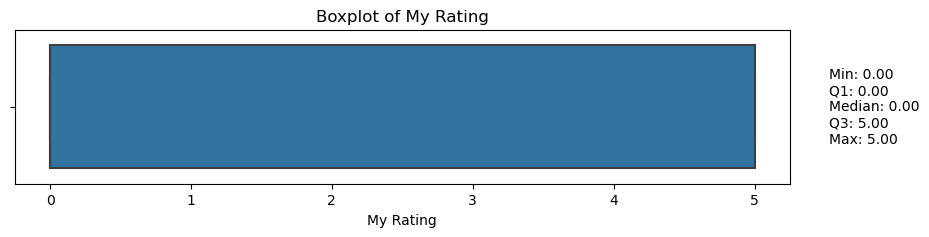

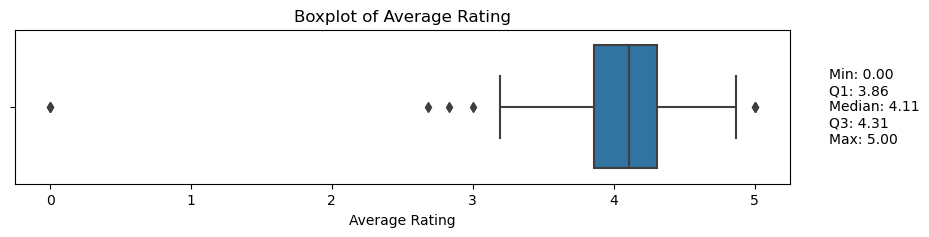

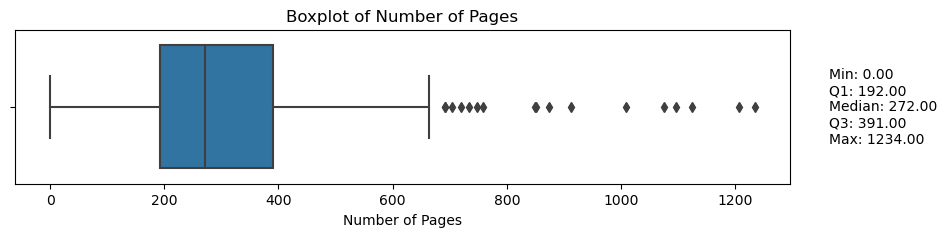

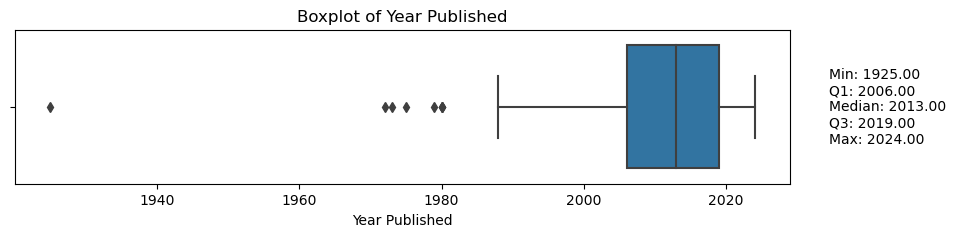

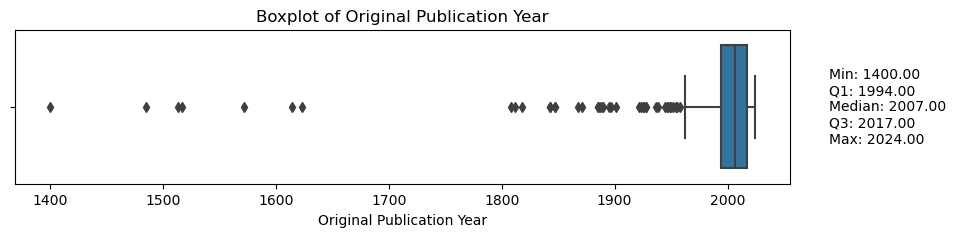

In [17]:
columns_to_check = ["My Rating", "Average Rating", "Number of Pages", "Year Published", "Original Publication Year"]

# Plot box plots for each column
for col in columns_to_check:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    
    # Calculate summary statistics
    desc = df[col].describe()
    min_val = desc['min']
    q1 = desc['25%']
    median = desc['50%']
    q3 = desc['75%']
    max_val = desc['max']
    
    # Add annotations to the box plot
    plt.text(1.05, 0.5, f"Min: {min_val:.2f}\nQ1: {q1:.2f}\nMedian: {median:.2f}\nQ3: {q3:.2f}\nMax: {max_val:.2f}",
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='left')
    
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Check that the structure of the dataset (columns, data types, dataframe size) has all changes

In [18]:
print("Columns and Data Types:")
display(df.dtypes)

print("\nSize of the DataFrame:")
display(df.shape)

Columns and Data Types:


Book Id                                int64
Title                                 object
Author                                object
Author l-f                            object
Additional Authors                    object
ISBN                                  object
ISBN13                               float64
My Rating                              int64
Average Rating                       float64
Publisher                             object
Binding                               object
Number of Pages                      float64
Year Published                       float64
Original Publication Year            float64
Date Read                     datetime64[ns]
Date Added                    datetime64[ns]
Bookshelves                           object
Bookshelves with positions            object
Exclusive Shelf                       object
My Review                             object
Spoiler                             category
Private Notes                         object
Read Count


Size of the DataFrame:


(386, 25)